### Notebook Setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.width', 1000) #better print view
pd.set_option('display.max_colwidth', 100) 

random_seed = 88 #for replication

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load Dataset from File

The training data containing 3 columns:

* `Text`: Raw input text
* `Label`: Political tendency label (Democratic/Republican/NA)

In [17]:
df = pd.read_csv("subreddit_dataset_full_labeled_gpt4o.csv", sep=",")

df.head()

,Text,Label
0,"Forensic Audit: ""We conclude that the Dominion Voting System is intentionally and purposefully d...",Republican
1,"Biden and The Squad's Tlaib stage heated confrontation on tarmac in Detroit. Tlaib, your family ...",Republican
2,"President-elect Biden is projected to win Pennsylvania and Nevada, putting him over 270 electora...",NaN
3,Not even an issue of politics it's wrong this man is being charged. What is going to happen with...,Republican
4,Young man wearing MAGA hat attacked at school and spit on by two girls / animals. He deserves ju...,Republican


In [18]:
print("Number of samples: {}".format(len(df)))

#remove whitespaces from df
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
print(f"Unique labels: {df['Label'].unique()}")

Number of samples: 14048
Unique labels: ['Republican' nan 'Democratic' 'NA']


Let's exclude NA (Not Applicable) labels from the dataset

In [19]:
df = df.dropna()
df = df[df["Label"] != "NA"]

df.head()

,Text,Label
0,"Forensic Audit: ""We conclude that the Dominion Voting System is intentionally and purposefully d...",Republican
1,"Biden and The Squad's Tlaib stage heated confrontation on tarmac in Detroit. Tlaib, your family ...",Republican
3,Not even an issue of politics it's wrong this man is being charged. What is going to happen with...,Republican
4,Young man wearing MAGA hat attacked at school and spit on by two girls / animals. He deserves ju...,Republican
6,"Trump says working on a very big trade deal with India, but will take time. India is, rightful, ...",Republican


In [20]:
print("Number of samples: {}".format(len(df)))

Number of samples: 10979


Let's visualize the distribution of class labels in form of a pie chart.

<Axes: >

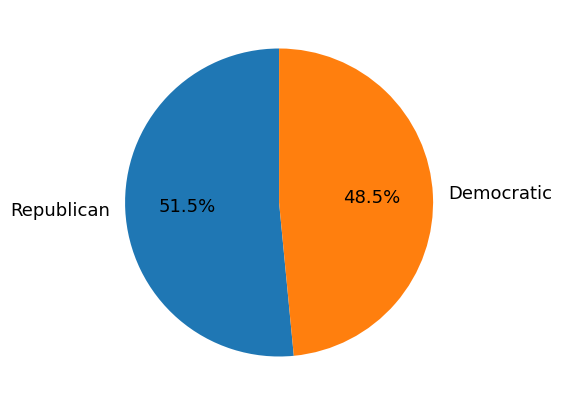

In [21]:
kwargs = dict(
    startangle = 90,
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    label      = ''
)

df['Label'].value_counts().plot.pie(**kwargs)

While not perfectly distributed, the class labels are arguebly well balanced.

#### Data Preparation

Train-Val-Test split

In [22]:
#Encode labels
label_encoder = LabelEncoder()
df['Label_encoded'] = label_encoder.fit_transform(df['Label'])


# Split data
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['Label_encoded'], random_state=random_seed)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['Label_encoded'], random_state=random_seed)

X_train = train_df['Text']
y_train = train_df['Label_encoded']

X_val = val_df['Text']
y_val = val_df['Label_encoded']

X_test = test_df['Text']
y_test = test_df['Label_encoded']

print(f"Size of X_train: {X_train.shape[0]}")
print(f"Size of X_val: {X_val.shape[0]}")
print(f"Size of X_test: {X_test.shape[0]}")

Size of X_train: 8783
Size of X_val: 1098
Size of X_test: 1098
